# Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/abc/housepricedata.csv")

In [6]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [7]:
dataset = df.values

In [8]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [9]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [13]:
from sklearn.model_selection import train_test_split
    

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [17]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6829 - accuracy: 0.5039 - val_loss: 0.6759 - val_accuracy: 0.5342
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5117 - val_loss: 0.6712 - val_accuracy: 0.5479
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5391 - val_loss: 0.6664 - val_accuracy: 0.6256
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.6292 - val_loss: 0.6615 - val_accuracy: 0.7260
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6898 - val_loss: 0.6569 - val_accuracy: 0.7352
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.7172 - val_loss: 0.6525 - val_accuracy: 0.7717
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.7387 - val_loss: 0.6483 - val_accuracy: 0.7900
Epoch 8/100


Evaluating our data on the test set:

In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9178


0.9178082346916199

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [22]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

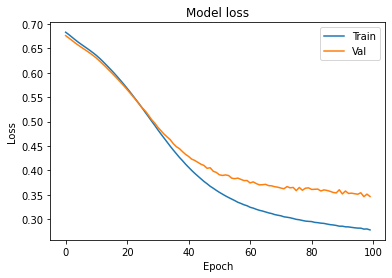

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

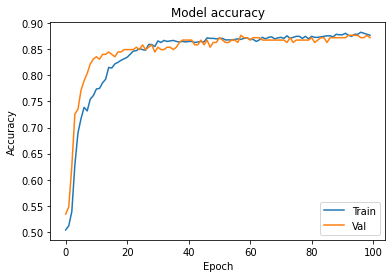

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [29]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 0.4862 - accuracy: 0.7573 - val_loss: 0.3946 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3451 - accuracy: 0.8493 - val_loss: 0.3986 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.3270 - accuracy: 0.8640 - val_loss: 0.3555 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2926 - accuracy: 0.8796 - val_loss: 0.3151 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2619 - accuracy: 0.8855 - val_loss: 0.3272 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.2727 - accuracy: 0.8816 - val_loss: 0.3370 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2688 - accuracy: 0.8826 - val_loss: 0.3444 - val_accuracy: 0.8676
Epoch 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

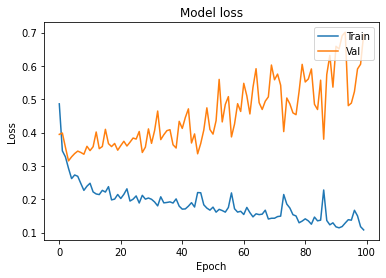

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

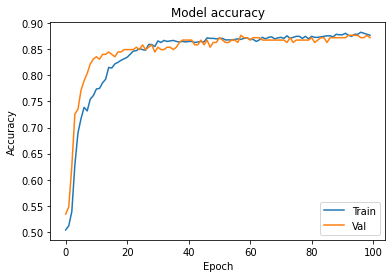

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 75ms/step - loss: 14.2395 - accuracy: 0.5959 - val_loss: 3.9060 - val_accuracy: 0.7123
Epoch 2/100
32/32 [==============================] - 2s 69ms/step - loss: 1.6671 - accuracy: 0.8474 - val_loss: 0.6746 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 2s 69ms/step - loss: 0.5831 - accuracy: 0.8532 - val_loss: 0.5356 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 65ms/step - loss: 0.5040 - accuracy: 0.8630 - val_loss: 0.5170 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 64ms/step - loss: 0.5222 - accuracy: 0.8493 - val_loss: 0.5407 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 63ms/step - loss: 0.4983 - accuracy: 0.8708 - val_loss: 0.4969 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 2s 68ms/step - loss: 0.4627 - accuracy: 0.8718 - val_loss: 0.4938 - val_accuracy: 0.8813
Epoch

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

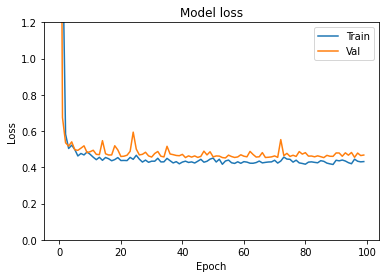

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

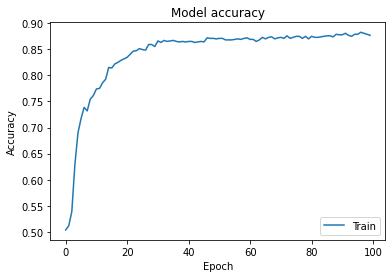

In [41]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()